## YouTube Trending Project
* ### Exploratory Data Analysis

### Table of Contents:
* 1.Exploratory Data Analysis
    * 1.1 Data Analysis
        * 1.1.1 Raw Data Information
    * 1.2 Feature Engineering
        * 1.2.1 Like/Dislike Ratio
        * 1.2.2 Log of Ratings, Views, and Comment Counts
        * 1.2.3 Days Lapsed
        * 1.2.4 Duration Columns
        * 1.2.5 Title Length
        * 1.2.6 Tag Count
    * 1.3 Variable Analysis
    * 1.4 Heat Map
    * 1.5 Plotting Distributions
    * 1.6 Category Analysis
        * 1.6.1 Graphing video counts by category
    * 1.7 Correlation Matrix
* 2.Cleaning
* 3.Modeling

### 1. Exploratory Data Analysis
##### Loading Data and Libraries


In [1]:
import helpers
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

df = helpers.load_df("Data/US_Data.csv")

trend_df = df.copy()

trend_df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,duration,country
0,bPiofmZGb8o,Second 2020 Presidential Debate between Donald...,2020-10-23T02:49:33Z,UCb--64Gl51jIEVE-GLDAVTg,C-SPAN,25,20.23.10,C-SPAN|CSPAN|2020|Donald Trump|Republican|Whit...,6641600,94601,6209,59293,https://i.ytimg.com/vi/bPiofmZGb8o/default.jpg,False,False,President Donald Trump and former Vice Preside...,1H59M15S,US
1,tcYodQoapMg,Ariana Grande - positions (official video),2020-10-23T04:00:10Z,UC0VOyT2OCBKdQhF3BAbZ-1g,ArianaGrandeVevo,10,20.23.10,ariana grande positions|positions ariana grand...,7516529,1485130,10810,140549,https://i.ytimg.com/vi/tcYodQoapMg/default.jpg,False,False,The official “positions” music video by Ariana...,2M58S,US
2,np9Ub1LilKU,Jack Harlow - Tyler Herro [Official Video],2020-10-22T19:00:14Z,UC6vZl7Qj7JglLDmN_7Or-ZQ,Jack Harlow,10,20.23.10,jack harlow|jack rapper|harlow rapper|private ...,1499338,153028,2006,11013,https://i.ytimg.com/vi/np9Ub1LilKU/default.jpg,False,False,Jack Harlow - Tyler HerroListen now: https://J...,3M,US
3,5S4bm3bAt9Y,SURPRISING BEST FRIEND WITH BORAT!!,2020-10-21T19:56:24Z,UCef29bYGgUSoJjVkqhcAPkw,David Dobrik Too,22,20.23.10,[none],5320147,596894,7044,33648,https://i.ytimg.com/vi/5S4bm3bAt9Y/default.jpg,False,False,Thank you Borat for coming over!! I like youWa...,5M55S,US
4,GuEkHIgR46k,Bryson Tiller - Always Forever (Official Video),2020-10-22T16:00:08Z,UCwhe-6skwaZxLomc-U6Wy1w,BrysonTillerVEVO,10,20.23.10,Bryson Tiller 2020|Bryson Tiller Serenity|Brys...,862087,82059,657,4459,https://i.ytimg.com/vi/GuEkHIgR46k/default.jpg,False,False,A N N I V E R S A R Y OUT NOW!Stream/Download:...,2M59S,US


In [2]:
trend_df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,duration,country
0,bPiofmZGb8o,Second 2020 Presidential Debate between Donald...,2020-10-23T02:49:33Z,UCb--64Gl51jIEVE-GLDAVTg,C-SPAN,25,20.23.10,C-SPAN|CSPAN|2020|Donald Trump|Republican|Whit...,6641600,94601,6209,59293,https://i.ytimg.com/vi/bPiofmZGb8o/default.jpg,False,False,President Donald Trump and former Vice Preside...,1H59M15S,US
1,tcYodQoapMg,Ariana Grande - positions (official video),2020-10-23T04:00:10Z,UC0VOyT2OCBKdQhF3BAbZ-1g,ArianaGrandeVevo,10,20.23.10,ariana grande positions|positions ariana grand...,7516529,1485130,10810,140549,https://i.ytimg.com/vi/tcYodQoapMg/default.jpg,False,False,The official “positions” music video by Ariana...,2M58S,US
2,np9Ub1LilKU,Jack Harlow - Tyler Herro [Official Video],2020-10-22T19:00:14Z,UC6vZl7Qj7JglLDmN_7Or-ZQ,Jack Harlow,10,20.23.10,jack harlow|jack rapper|harlow rapper|private ...,1499338,153028,2006,11013,https://i.ytimg.com/vi/np9Ub1LilKU/default.jpg,False,False,Jack Harlow - Tyler HerroListen now: https://J...,3M,US
3,5S4bm3bAt9Y,SURPRISING BEST FRIEND WITH BORAT!!,2020-10-21T19:56:24Z,UCef29bYGgUSoJjVkqhcAPkw,David Dobrik Too,22,20.23.10,[none],5320147,596894,7044,33648,https://i.ytimg.com/vi/5S4bm3bAt9Y/default.jpg,False,False,Thank you Borat for coming over!! I like youWa...,5M55S,US
4,GuEkHIgR46k,Bryson Tiller - Always Forever (Official Video),2020-10-22T16:00:08Z,UCwhe-6skwaZxLomc-U6Wy1w,BrysonTillerVEVO,10,20.23.10,Bryson Tiller 2020|Bryson Tiller Serenity|Brys...,862087,82059,657,4459,https://i.ytimg.com/vi/GuEkHIgR46k/default.jpg,False,False,A N N I V E R S A R Y OUT NOW!Stream/Download:...,2M59S,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,lS4Tit7taes,Welcome To The World,2021-01-11T21:39:06Z,UC-SV8-bUJfXjrRMnp7F8Wzw,Roman Atwood Vlogs,22,21.20.01,Roman|Atwood|The Atwoods|Brittney|Family|Famil...,3057434,240134,2562,26222,https://i.ytimg.com/vi/lS4Tit7taes/default.jpg,False,False,Thank you so much for the warm welcome of our ...,10M1S,NaN
2796,W39QY_jE59w,Lie To Me ft. Lil Durk & Say What You Mean (Ji...,2021-01-12T22:02:00Z,UCjkF4n3bIuNNy1EVcsavFww,QueenNaijaVEVO,10,21.20.01,queen naija lie to me|queen naija lie to me ly...,337272,31069,256,1922,https://i.ytimg.com/vi/W39QY_jE59w/default.jpg,False,False,Stream/Download Queen Naija's debut album miss...,4M3S,NaN
2797,vBHild0PiTE,Lana Del Rey - Chemtrails Over The Country Clu...,2021-01-11T19:10:09Z,UC3N5y6UWKJaKqoU2b_0MfTQ,LanaDelReyVEVO,10,21.20.01,Lana|Del|Rey|Chemtrails|Over|The|Country|Club|...,9622191,592262,12500,55387,https://i.ytimg.com/vi/vBHild0PiTE/default.jpg,False,False,Lana Del Rey - Chemtrails Over The Country Clu...,5M41S,NaN
2798,m3zAUlmR4vw,The Sims 4 Paranormal Stuff Pack: Official Rev...,2021-01-12T16:00:09Z,UCFXKLSrT-4-Mf5TRqv40rgw,The Sims,20,21.20.01,The Sims 4|The Sims 4 Trailer|The Sims 4 Gamep...,1006772,49400,4614,6647,https://i.ytimg.com/vi/m3zAUlmR4vw/default.jpg,False,False,A haunting new pack is crossing over to our re...,1M25S,NaN


### 1.1 Data Overview
#### 1.1.1 Raw data information


In [3]:
np.shape(trend_df)

(2800, 18)

In [4]:
trend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           2800 non-null   object
 1   title              2800 non-null   object
 2   publishedAt        2800 non-null   object
 3   channelId          2800 non-null   object
 4   channelTitle       2800 non-null   object
 5   categoryId         2800 non-null   int64 
 6   trending_date      2800 non-null   object
 7   tags               2800 non-null   object
 8   view_count         2800 non-null   int64 
 9   likes              2800 non-null   int64 
 10  dislikes           2800 non-null   int64 
 11  comment_count      2800 non-null   int64 
 12  thumbnail_link     2800 non-null   object
 13  comments_disabled  2800 non-null   bool  
 14  ratings_disabled   2800 non-null   bool  
 15  description        2781 non-null   object
 16  duration           2800 non-null   object


### 1.2 Feature Engineering
* ##### 1.2.1 Like/Dislike Ratio
* ##### 1.2.2 Log of Ratings, Views, and Comment Counts
* ##### 1.2.3 Days Lapsed - Number of days between trending date and publish time
* ##### 1.2.4 Duration Columns - Video's duration broken down into hour, minute, and second columns
* ##### 1.2.5 Title Length - Character count of title
* ##### 1.2.6 Tag Count - Number of tags

In [5]:
# Feature Engineering
helpers.featureEng(trend_df)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,dislikes_log,comment_log,new_date_published,new_date_trending,days_lapse,durationHr,durationMin,durationSec,titleLength,tagCount
0,bPiofmZGb8o,Second 2020 Presidential Debate between Donald...,2020-10-23 02:49:33,UCb--64Gl51jIEVE-GLDAVTg,C-SPAN,25,2020-10-23,C-SPAN|CSPAN|2020|Donald Trump|Republican|Whit...,6641600,94601,...,8.733755,10.990247,2020-10-23,2020-10-23,0.0,1,59,15,66,12
1,tcYodQoapMg,Ariana Grande - positions (official video),2020-10-23 04:00:10,UC0VOyT2OCBKdQhF3BAbZ-1g,ArianaGrandeVevo,10,2020-10-23,ariana grande positions|positions ariana grand...,7516529,1485130,...,9.288227,11.853311,2020-10-23,2020-10-23,0.0,0,2,58,42,22
2,np9Ub1LilKU,Jack Harlow - Tyler Herro [Official Video],2020-10-22 19:00:14,UC6vZl7Qj7JglLDmN_7Or-ZQ,Jack Harlow,10,2020-10-23,jack harlow|jack rapper|harlow rapper|private ...,1499338,153028,...,7.603898,9.306832,2020-10-22,2020-10-23,1.0,0,3,0,42,26
3,5S4bm3bAt9Y,SURPRISING BEST FRIEND WITH BORAT!!,2020-10-21 19:56:24,UCef29bYGgUSoJjVkqhcAPkw,David Dobrik Too,22,2020-10-23,[none],5320147,596894,...,8.859931,10.423709,2020-10-21,2020-10-23,2.0,0,5,55,35,0
4,GuEkHIgR46k,Bryson Tiller - Always Forever (Official Video),2020-10-22 16:00:08,UCwhe-6skwaZxLomc-U6Wy1w,BrysonTillerVEVO,10,2020-10-23,Bryson Tiller 2020|Bryson Tiller Serenity|Brys...,862087,82059,...,6.487684,8.402680,2020-10-22,2020-10-23,1.0,0,2,59,47,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,lS4Tit7taes,Welcome To The World,2021-01-11 21:39:06,UC-SV8-bUJfXjrRMnp7F8Wzw,Roman Atwood Vlogs,22,2021-01-20,Roman|Atwood|The Atwoods|Brittney|Family|Famil...,3057434,240134,...,7.848543,10.174354,2021-01-11,2021-01-20,9.0,0,10,1,20,17
2796,W39QY_jE59w,Lie To Me ft. Lil Durk & Say What You Mean (Ji...,2021-01-12 22:02:00,UCjkF4n3bIuNNy1EVcsavFww,QueenNaijaVEVO,10,2021-01-20,queen naija lie to me|queen naija lie to me ly...,337272,31069,...,5.545177,7.561122,2021-01-12,2021-01-20,8.0,0,4,3,63,19
2797,vBHild0PiTE,Lana Del Rey - Chemtrails Over The Country Clu...,2021-01-11 19:10:09,UC3N5y6UWKJaKqoU2b_0MfTQ,LanaDelReyVEVO,10,2021-01-20,Lana|Del|Rey|Chemtrails|Over|The|Country|Club|...,9622191,592262,...,9.433484,10.922100,2021-01-11,2021-01-20,9.0,0,5,41,64,11
2798,m3zAUlmR4vw,The Sims 4 Paranormal Stuff Pack: Official Rev...,2021-01-12 16:00:09,UCFXKLSrT-4-Mf5TRqv40rgw,The Sims,20,2021-01-20,The Sims 4|The Sims 4 Trailer|The Sims 4 Gamep...,1006772,49400,...,8.436850,8.801921,2021-01-12,2021-01-20,8.0,0,1,25,57,32


### 1.3 Variable Analysis
* ##### 1.3.1 Data Types
* ##### 1.3.2 Descriptive Statistics

In [6]:
trend_df.dtypes

video_id                      object
title                         object
publishedAt           datetime64[ns]
channelId                     object
channelTitle                  object
categoryId                     int64
trending_date         datetime64[ns]
tags                          object
view_count                     int64
likes                          int64
dislikes                       int64
comment_count                  int64
thumbnail_link                object
comments_disabled               bool
ratings_disabled                bool
description                   object
duration                      object
country                       object
likeRatio                    float64
likes_log                    float64
views_log                    float64
dislikes_log                 float64
comment_log                  float64
new_date_published            object
new_date_trending             object
days_lapse                   float64
durationHr                     int64
d

In [7]:
# Descriptive Statistics of the curated dataset
trend_df.describe()

,categoryId,view_count,likes,dislikes,comment_count,likeRatio,likes_log,views_log,dislikes_log,comment_log,days_lapse,durationHr,durationMin,durationSec,titleLength,tagCount
count,2736.000000,2.736000e+03,2.736000e+03,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,18.635234,2.607726e+06,1.450407e+05,2987.810307,14220.269371,0.936644,10.888458,14.074614,6.975779,8.477444,3.923246,0.029605,9.849781,27.765716,51.442251,18.710526
std,7.361940,4.376031e+06,2.969052e+05,7083.065445,43864.648306,0.105688,1.443785,1.131514,1.375921,1.383329,2.183860,0.243828,9.568406,18.302684,20.423137,12.568187
min,1.000000,3.325700e+04,1.930000e+02,14.000000,6.000000,-0.292719,5.262690,10.412021,2.639057,1.791759,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,10.000000,5.713928e+05,2.057500e+04,406.000000,1997.750000,0.935217,9.931832,13.255832,6.006353,7.599777,2.000000,0.000000,3.000000,11.000000,38.000000,9.000000
50%,22.000000,1.193234e+06,5.528100e+04,936.000000,4586.500000,0.963115,10.920185,13.992177,6.841615,8.430872,4.000000,0.000000,8.000000,28.000000,48.000000,18.000000
75%,24.000000,2.727244e+06,1.378052e+05,2683.250000,11476.000000,0.978638,11.833597,14.818802,7.894784,9.348013,5.000000,0.000000,14.000000,43.000000,63.000000,28.000000
max,29.000000,4.834150e+07,3.033311e+06,119833.000000,761325.000000,0.998719,14.925165,17.693801,11.693854,13.542816,19.000000,6.000000,59.000000,59.000000,100.000000,62.000000


### 1.4 Heat Map

Checking for Missing Values

<AxesSubplot:>

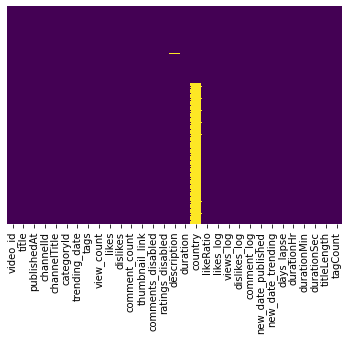

In [8]:
sns.heatmap(trend_df.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')

### 1.5 Plotting Distributions
#### 1.5.1 Distribution Graphs of Logs

Checking for normal distribution of views, likes, dislikes, and comment counts

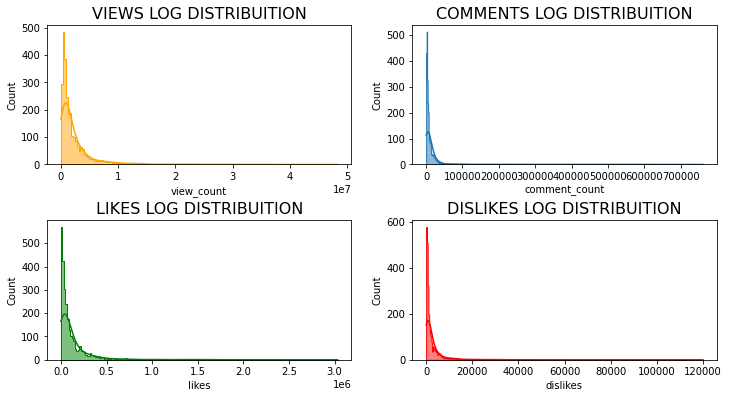

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

g1 = sns.histplot(ax=axes[0, 0], data=trend_df, x="view_count", kde=True, element="step", color="orange")
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

g2 = sns.histplot(ax=axes[0,1], data=trend_df, x="comment_count", kde=True, element="step")
g2.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

g3 = sns.histplot(ax=axes[1,0], data=trend_df, x="likes", kde=True, element="step", color="green")
g3.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

g4 = sns.histplot(ax=axes[1,1], data=trend_df, x="dislikes", kde=True, element="step", color="red")
g4.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)


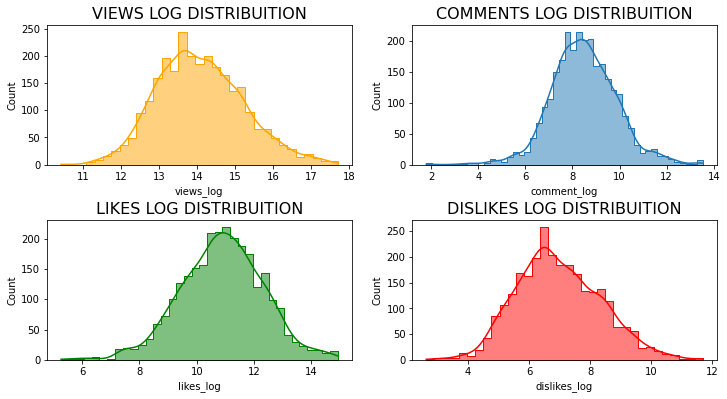

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

g1 = sns.histplot(ax=axes[0, 0], data=trend_df, x="views_log", kde=True, element="step", color="orange")
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

g2 = sns.histplot(ax=axes[0,1], data=trend_df, x="comment_log", kde=True, element="step")
g2.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

g3 = sns.histplot(ax=axes[1,0], data=trend_df, x="likes_log", kde=True, element="step", color="green")
g3.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

g4 = sns.histplot(ax=axes[1,1], data=trend_df, x="dislikes_log", kde=True, element="step", color="red")
g4.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)


#### 1.5.2 Finding Outlier Counts

Checking the number of outliers for the log variables

In [11]:
print(len(helpers.findOutliers(trend_df['views_log'])))

2566


In [12]:
print(len(helpers.findOutliers(trend_df['likes_log'])))

2502


In [13]:
print(len(helpers.findOutliers(trend_df['dislikes_log'])))

2547


In [14]:
print(len(helpers.findOutliers(trend_df['comment_log'])))

2540


### 1.6 Category Analysis

#### Category Dictionary
- 1 - Film & Animation
- 2 - Autos & Vehicles 
- 10 - Music
- 15 - Pets & Animals
- 17 - Sports
- 19 - Travel & Events
- 20 - Gaming
- 22 - People & Blogs
- 23 - Comedy
- 24 - Entertainment
- 25 - News & Politics
- 26 - Howto & Style
- 27 - Education
- 28 - Science & Technology
- 29 - Nonprofits & Activism 
<br> More at: https://gist.github.com/dgp/1b24bf2961521bd75d6c



In [15]:
# Figuring out the popular categories
trend_df.categoryId.value_counts()

10    550
24    533
17    363
20    239
22    228
28    170
23    139
26    129
1     115
25    108
27     64
2      63
19     17
29     11
15      7
Name: categoryId, dtype: int64

##### 1.6.1 Graphing video counts by category
Music, Entertainment, and Sports seem to have the most videos.

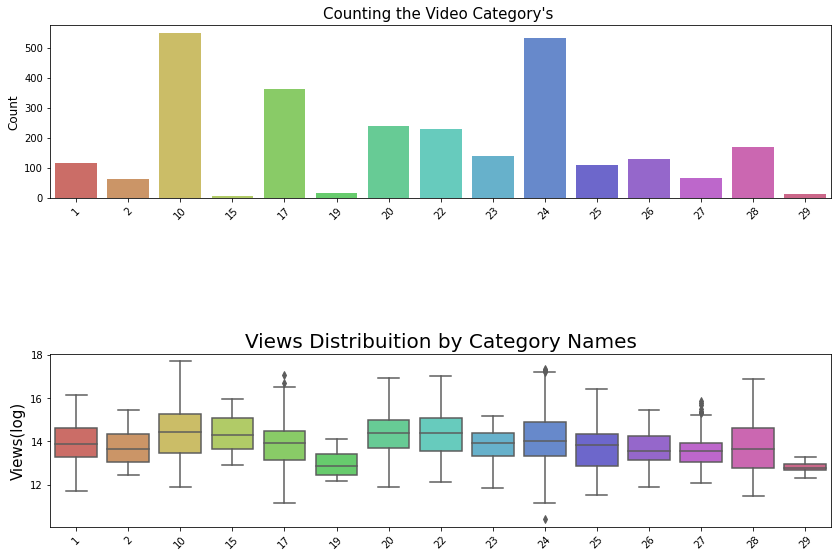

In [16]:
plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot(x='categoryId', data=trend_df, palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='categoryId', y='views_log', data=trend_df, palette="hls")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

### 1.7 Correlation Matrix

Drop varaiables with close to zero correlation

<AxesSubplot:>

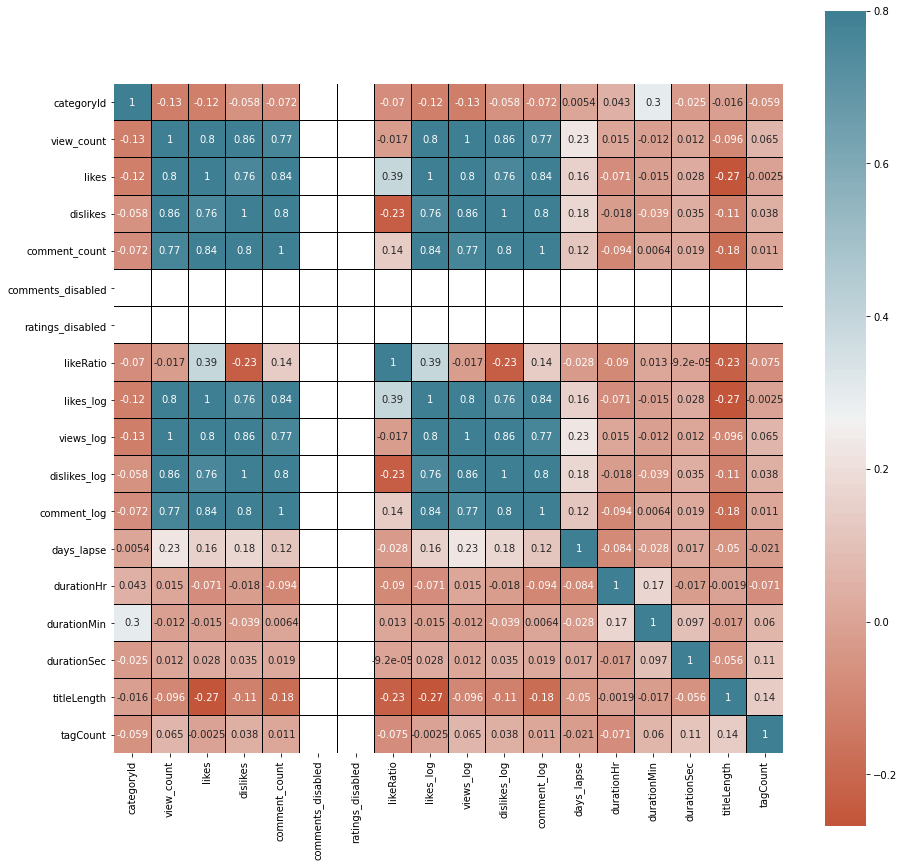

In [17]:
corr = trend_df.corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap = sns.diverging_palette(20, 220, n=200), linecolor='black')
